In [31]:
pip install linkpred


In [32]:
import linkpred
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import csv



In [33]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
def read_net_w(filepath):
    g = nx.Graph()
    with open(filepath, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            g.add_edge(
                row['Source'],
                row['Target'],
                weight=int(row['weight'])
            )
    return g

# Ашиглах:
g = read_net_w("/content/drive/MyDrive/Colab Notebooks/social network/book5.csv")

# Жишээ: графын мэдээлэл шалгах
print(f"Нийт зангилаа: {g.number_of_nodes()}")
print(f"Нийт холбоос: {g.number_of_edges()}")


Нийт зангилаа: 317
Нийт холбоос: 760


In [35]:
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges()) # We aim to predict onl
cn_results = cn.predict()

top = cn_results.top(5)
for edge, score in top.items():
  print(edge, score)



Ysilla - Jon-Connington 6.0
Tyrion-Lannister - Robert-Baratheon 6.0
Theon-Greyjoy - Jon-Snow 6.0
Stannis-Baratheon - Gilly 6.0
Stannis-Baratheon - Arya-Stark 6.0


In [ ]:
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())
jc_results = jc.predict()

top = jc_results.top(5)
for edge, score in top.items():
  print(edge, score)



Yurkhaz-zo-Yunzak - Quaithe 1.0
Yurkhaz-zo-Yunzak - Lysono-Maar 1.0
Yurkhaz-zo-Yunzak - Ghael 1.0
Yurkhaz-zo-Yunzak - Ezzara 1.0
Yurkhaz-zo-Yunzak - Eroeh 1.0


In [ ]:
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())
aa_results = aa.predict()

top = aa_results.top(5)
for edge, score in top.items():
  print(edge, score)



Haldon - Daenerys-Targaryen 3.268864482424701
Stannis-Baratheon - Gilly 2.9199461441753884
Lorren - Asha-Greyjoy 2.7221531878846923
Ysilla - Jon-Connington 2.5809964636982645
Mance-Rayder - Jeyne-Poole 2.3917854871108535


In [ ]:
kz = linkpred.predictors.Katz(g, excluded=g.edges())
kz_results = kz.predict()

top = kz_results.top(5)
for edge, score in top.items():
 print(edge, score)



Tormund - Stannis-Baratheon 0.004379774804316001
Skahaz-mo-Kandaq - Quentyn-Martell 0.0035904250813749996
Penny - Haldon 0.0033678259880290003
Val - Melisandre 0.0027959699247209996
Irri - Barristan-Selmy 0.00279530479421


In [ ]:
gd = linkpred.predictors.GraphDistance(g, excluded=g.edges())
gd_results = gd.predict()

top = gd_results.top(5)
for edge, score in top.items():
 print(edge, score)


Tormund - Stannis-Baratheon 29.674796747967477
Penny - Haldon 28.19469026548673
Tormund - Melisandre 24.489795918367346
Melisandre - Bowen-Marsh 23.225806451612904
Penny - Jon-Connington 22.739583333333336


In [ ]:
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())
simrank_results = simrank.predict(c=0.5)

top = simrank_results.top(5)
for edge, score in top.items():
   print(edge, score)


Wulfe - Ralf-(Limper) 0.5
Wulfe - Longwater-Pyke 0.5
Wulfe - Kerwin 0.5
Willow-Witch-eye - Wex-Pyke 0.5
Willow-Witch-eye - Harwood-Stout 0.5


In [ ]:
rnd = linkpred.predictors.Random(g, excluded=g.edges())
rnd_results = rnd.predict()

top = simrank_results.top(5)
for edge, score in top.items():
 print(edge, score)

Wulfe - Ralf-(Limper) 0.5
Wulfe - Longwater-Pyke 0.5
Wulfe - Kerwin 0.5
Willow-Witch-eye - Wex-Pyke 0.5
Willow-Witch-eye - Harwood-Stout 0.5


In [37]:
import random
import itertools
from linkpred.evaluation import Pair

# Building the test network
test = read_net_w(f'/book4.csv')

# Exclude test network from learning phase
training = g.copy()

# Node set
nodes = list(g.nodes())
nodes.extend(list(test.nodes()))
# Compute the test set and the universe set
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])



In [38]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

In [39]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)


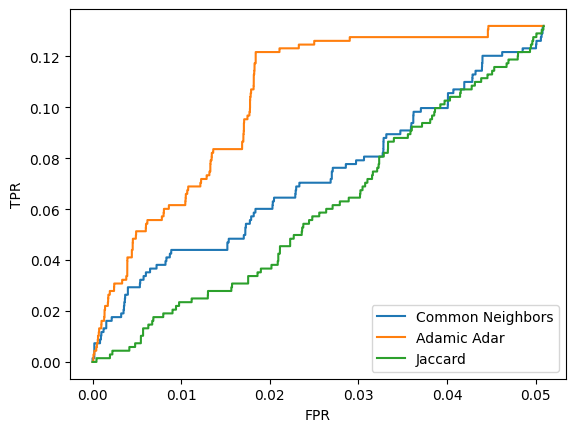

In [40]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")


Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.003658022190360594
Adamic Adar: 	 0.005231116071808705
Jaccard: 	 0.0030498113743429927
